# Example 15.1: Combustion

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
$\require{mhchem}$
One kmol of Acetylene ($\ce{C2H2}$) is burned with air that contains $\ce{3 kmol}$ of $\ce{O2}$. Assuming the products contain only $\ce{CO2, H2O, O2}$, and $\ce{N2}$, determine the mole number of each gas in the products and the air-fuel ratio.

## Solution

__[Video Explanation](https://iad.scorm.canvaslms.com/courses/sconeID/scone_prod.sha256_816ff8391dc9a744037ba229245b46f13e5a3cdcd0cbb3762d923715151c0377/0/Ex15.mp4)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
from kilojoule.tables import Cengel

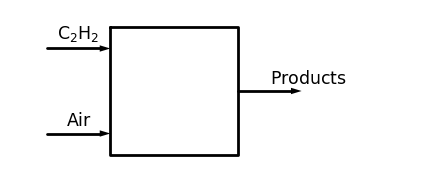

In [4]:
from kilojoule.schemdraw import *
with schemdraw.Drawing() as d:
    d += (chamb := thermo.HX(passes=3,coils=False))
    d += elm.Arrow().at(chamb.W1).left(1.5).reverse().label(r'$\mathrm{C_2H_2}$')
    d += elm.Arrow().at(chamb.W3).left(1.5).reverse().label(r'$\mathrm{Air}$')
    d += elm.Arrow().at(chamb.E).right(1.5).label(r'$\mathrm{Products}$',halign='left')

## Chemical Balance

\begin{equation}
	\ce{ C2H2 + 3(O2 + $3.76$ N2) -> a CO2 + b H2O + c O2 + d N2 }
\end{equation}

\begin{align}
	\ce{C}:& & % Carbon Balance
    	2&=a &
        &\Rightarrow&
        a&=2\\
	\ce{H}:& & % Hydrogen Balance
    	2&=b2 &
        &\Rightarrow&
        b&=1\\
	\ce{O}:& & % Oxygen Balance
    	(3)(2)&=a(2)+b+c(2)  &
        &\Rightarrow& 
        c&= \frac{6-2a-b}{2}=\frac{6-2(2)-1}{2}=0.5\\
	\ce{N2}:& & % Nitrogen Balance
    	3(3.76)&=d &
        &\Rightarrow&
        d&=11.28\\
\end{align}

\begin{equation}
	\ce{C2H2 + 3(O2 + $3.76$N2) -> 2 CO2 + H2O + $0.5$O2 + $11.28$ N2}
\end{equation}

In [5]:
a = 2
b = 1
c = 0.5
d = 11.28

### Property Tables

In [6]:
A1 = Cengel.Table("A1")
N2 = A18 = Cengel.Table("A18")
O2 = A19 = Cengel.Table("A19")
CO2 = A20 = Cengel.Table("A20")
CO = A21 = Cengel.Table("A21")
H2 = A22 = Cengel.Table("A22")
H2O = A23 = Cengel.Table("A23")
O = A24 = Cengel.Table("A24")
OH = A25 = Cengel.Table("A25")
A26 = Cengel.Table("A26")
A27 = Cengel.Table("A27")

## Air-to-Fuel Ratio

In [7]:
%%showcalc
"### Mass of air"
"Moles of air per mole of fuel"
N_air = 3*Quantity(4.76,'mol')
"Molar mass of air"
M_air = A1.M("Air")
"Mass of air per per mole of fuel"
m_air = (N_air*M_air).to('kg')

"### Mass of fuel"
"Mole of fuel per mole of fuel (always 1)"
N_fuel = Quantity(1,'mol')
"Molar mass of fuel"
M_fuel = A27.M("C2H2")
"Mass of fuel per mole of fuel (Molar Mass)"
m_fuel = (N_fuel*M_fuel).to('kg')

"### Air-to-Fuel Ratio"
AF = m_air/m_fuel

### Mass of air
Moles of air per mole of fuel
\begin{align}
  N_{air} &=   3  \cdot  4.76\ \mathrm{mol}   = 14.28\ \mathrm{mol} 
\end{align}

Molar mass of air
\begin{align}
  M_{air} &=  \mathrm{ \underset{ A1 }{ M } }\left( Air \right)  = 28.97\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

Mass of air per per mole of fuel
\begin{align}
  m_{air} &=   N_{air}  \cdot  M_{air}  \\
    &=  14.28\ \mathrm{mol}  \cdot  28.97\ \frac{\mathrm{kg}}{\mathrm{kmol}} \\
    &= 0.41369\ \mathrm{kg}
\end{align}

### Mass of fuel
Mole of fuel per mole of fuel (always 1)
\begin{align}
  N_{fuel} &=  1\ \mathrm{mol} 
\end{align}

Molar mass of fuel
\begin{align}
  M_{fuel} &=  \mathrm{ \underset{ A27 }{ M } }\left( C2H2 \right)  = 26.038\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

Mass of fuel per mole of fuel (Molar Mass)
\begin{align}
  m_{fuel} &=   N_{fuel}  \cdot  M_{fuel}  \\
    &=  1\ \mathrm{mol}  \cdot  26.038\ \frac{\mathrm{kg}}{\mathrm{kmol}} \\
    &= 0.026038\ \mathrm{kg}
\end{align}

### Air-to-Fuel Ratio
\begin{align}
  AF &=  \frac{ m_{air} }{ m_{fuel} } \\
    &= \frac{ 0.41369\ \mathrm{kg} }{ 0.026038\ \mathrm{kg} }\\
    &= 15.888
\end{align}



In [9]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-input --no-prompt "Ex15.1 Combustion.ipynb"